# scrape data

In [1]:
import json
import csv
import tweepy
import re

def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    api.verify_credentials
    
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w') as file:

        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search_tweets, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(1000000):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' ').encode('utf-8'), tweet.user.screen_name.encode('utf-8'), [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])

In [2]:
consumer_key = 'your_consumer_key'
consumer_secret = 'your_consumer_secret'
access_token = 'your_access_token'
access_token_secret = 'your_access_token_secret'
hashtag_phrase = '#jeno'

if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

In [3]:
import pandas as pd
df = pd.read_csv('jeno.csv')
df = df.drop_duplicates()
df

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2022-01-06 03:29:01+00:00,b'Pls vote SMA for 7dream\xf0\x9f\xa5\xba #NCT...,b'jenjamjj',"['NCTDREAM', 'MARK', 'RENJUN', 'JENO', 'HAECHA...",157
1,2022-01-06 03:23:00+00:00,b'\xc2\xa9 as marked #JENO #\xec\xa0\x9c\xeb\x...,b'jenoperhour',"['JENO', '제노', 'NCTDREAM']",50306
2,2022-01-06 03:20:39+00:00,b'#JENO got the ruby https://t.co/J8jWTar09k',b'chenIefsrd',['JENO'],53
3,2022-01-06 03:10:14+00:00,b'\xe3\x80\x901/5\xe3\x80\x91\xe2\x9c\xa8K-pop...,b'KPOP_JUICE_EN',"['NCT', 'Mark', 'マーク', 'NCT', 'Jeno', 'ジェノ', '...",5439
4,2022-01-06 02:36:49+00:00,b'\xf0\x9d\x97\xb9\xf0\x9d\x97\xbc\xf0\x9d\x97...,b'Norenisreal2323',"['NOREN', 'JENO', 'RENJUN']",12648
...,...,...,...,...,...
2033,2021-12-28 15:39:14+00:00,"b""[PIC] 211228 smtown's Instagram Story Update...",b'NCTWORLDINA23',"['JOHNNY', 'JENO', 'JAEHYUN', 'SUNGCHAN', 'NCT']",54
2034,2021-12-28 15:31:46+00:00,b'@thetop_100 I vote #JENO of #NCT for #100mos...,b's0119710',"['JENO', 'NCT', '100mosthandsome2021', 'thetop...",6
2035,2021-12-28 15:18:51+00:00,b'want to trade have: kun photobook PC want:...,b'renjunsometimes',"['pasarNCTmy', 'pasarNCT', 'pasarwayv', 'kun',...",13
2036,2021-12-28 15:12:34+00:00,b'Nct MUMO #nct #nct2021 #nctwts #Jaehyun #JAE...,b'Borntobecute71',"['nct', 'nct2021', 'nctwts', 'Jaehyun', 'JAEMI...",130


# histogram

In [4]:
# post time histogram
import collections
import matplotlib.pyplot as plt


df['hour'] = ''
for i in range(0, len(df)):
    df['hour'][i] = int(df['timestamp'][i][11:13])


/Users/patricia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


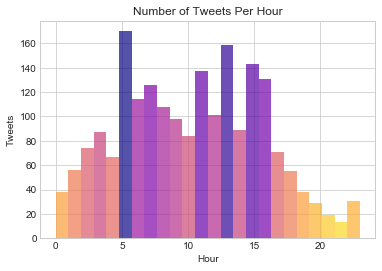

<Figure size 4320x2016 with 0 Axes>

In [24]:
#c = collections.Counter(df['hour'])
n, bins, patches = plt.hist(df['hour'], bins = 24, linewidth=0.5, alpha=0.7)
n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.plasma(1 - n[i]/max(n)))
plt.title('Number of Tweets Per Hour') 
plt.xlabel('Hour') 
plt.ylabel('Tweets') 
plt.savefig("hist.png")
plt.figure(figsize=(60,28))
plt.style.use('seaborn-whitegrid')
plt.show()

# wordcloud

In [6]:
# hashtag list
punc = '''[]'",'''
df['hashtag_list'] = ''
input_str = df['all_hashtags']
for i in range(0, len(df)):
  s = df['all_hashtags'][i]
  for ele in s:
    if ele in punc:
        s = s.replace(ele, "")
  df['hashtag_list'][i] =  s.split()

/Users/patricia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

flat_hashtags = []
for hlist in df['hashtag_list']:
    for h in hlist:
        h = h.upper()
        flat_hashtags.append(h)

s = hashtag_phrase[1:].upper()
stop_words = STOPWORDS.update([s])

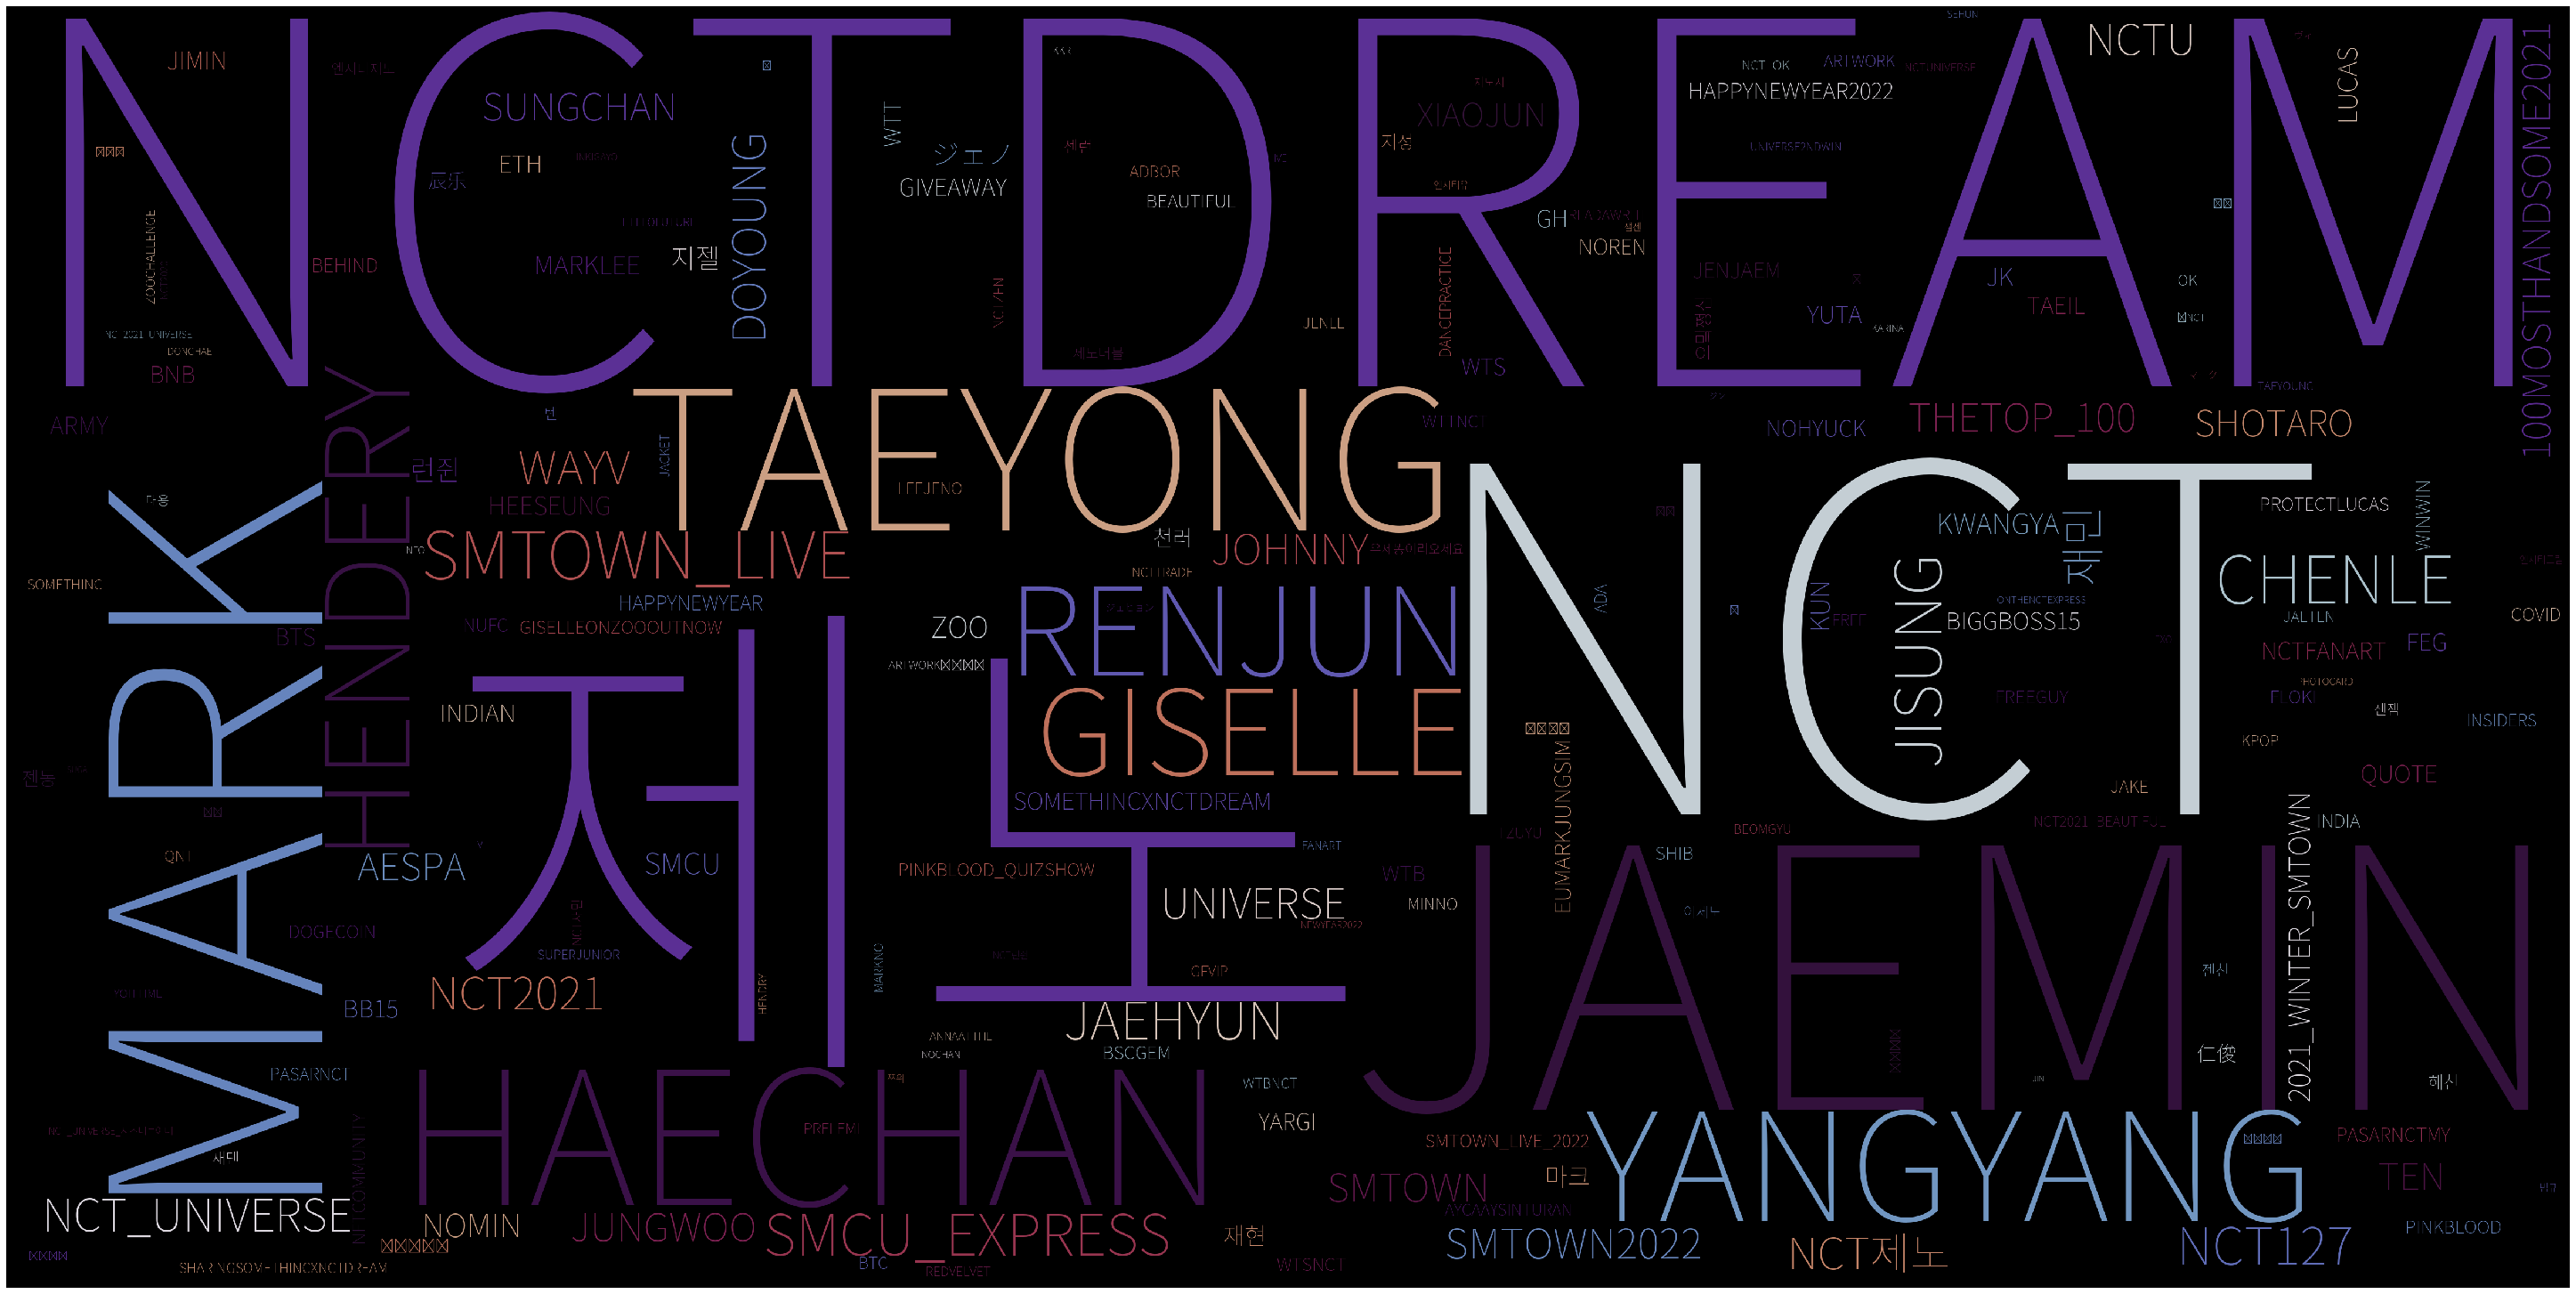

In [8]:
wordcloud = WordCloud(width = 5000, 
                      height = 2500, 
                      stopwords = stop_words,
                      collocations=False,
                      background_color ='black',
                      colormap='twilight_shifted',
                      font_path='SourceHanSans.ttc').generate(" ".join(flat_hashtags))
 
plt.figure(figsize = (40, 40), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wc.png", format="png")
plt.show()

# most common hashtag

In [9]:
# most common hashtag
c = collections.Counter(flat_hashtags)
rank = sorted(c.items(), key=lambda item: (-item[1], item[0]))
rank

[('JENO', 2047),
 ('제노', 579),
 ('NCTDREAM', 571),
 ('NCT', 517),
 ('JAEMIN', 333),
 ('MARK', 207),
 ('TAEYONG', 203),
 ('HAECHAN', 194),
 ('YANGYANG', 165),
 ('RENJUN', 160),
 ('GISELLE', 150),
 ('HENDERY', 144),
 ('SMTOWN_LIVE', 140),
 ('CHENLE', 139),
 ('JISUNG', 130),
 ('SMCU_EXPRESS', 103),
 ('JAEHYUN', 87),
 ('NCT127', 84),
 ('WAYV', 68),
 ('DOYOUNG', 67),
 ('NCT_UNIVERSE', 66),
 ('NCT2021', 64),
 ('재민', 63),
 ('NCT제노', 62),
 ('NCTU', 59),
 ('JOHNNY', 56),
 ('UNIVERSE', 56),
 ('SMTOWN2022', 55),
 ('SMTOWN', 50),
 ('THETOP_100', 50),
 ('JUNGWOO', 49),
 ('100MOSTHANDSOME2021', 48),
 ('AESPA', 47),
 ('SUNGCHAN', 47),
 ('TEN', 46),
 ('SHOTARO', 43),
 ('XIAOJUN', 36),
 ('NOMIN', 34),
 ('SMCU', 28),
 ('2021_WINTER_SMTOWN', 27),
 ('ZOO', 27),
 ('KWANGYA', 25),
 ('ジェノ', 25),
 ('런쥔', 24),
 ('지젤', 23),
 ('KUN', 22),
 ('LUCAS', 22),
 ('MARKLEE', 21),
 ('HEESEUNG', 19),
 ('JIMIN', 19),
 ('마크', 19),
 ('ARMY', 18),
 ('BB15', 18),
 ('ETH', 18),
 ('GIVEAWAY', 18),
 ('INDIAN', 18),
 ('JK', 18),
 

# sentiment analysis

In [10]:
# sentiment analysis
import nltk
#nltk.download(["names", "stopwords", "state_union", "twitter_samples", "movie_reviews", "averaged_perceptron_tagger", "vader_lexicon", "punkt"])

In [11]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
stopwords = nltk.corpus.stopwords.words("english")

In [12]:
for i in range(len(df)):
  df['tweet_text'][i] = df['tweet_text'][i][2:]

/Users/patricia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
import dataclasses
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning(data):
    data = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
    data = re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+", "", data)
    data = re.sub(r"\\x\w+[,]|\\x\w+|[,]\\x\w+", "", data)
    data = re.sub(r"\#\w+[,]|\#\w+|[,]\#\w+", "", data)
    data = re.sub('[0-9]+', '', data)
    translator = str.maketrans('', '', punctuations_list)
    data = data.translate(translator)
    return re.sub('[^a-zA-Z]',' ',data)
    
flat_tweets = df['tweet_text'].apply(lambda x: cleaning(x))

flat_tweets

0                        Pls vote SMA for dream          
1                                          as marked     
2                                          got the ruby  
3       pop Artist Ranking on Twitter                 ...
4                                                        
                              ...                        
2033    PIC  smtowns Instagram Story Update with    am...
2034                                    I vote  of  for  
2035    want to trade   have kun photobook PC want jen...
2036                   Nct MUMO                  sUUhOeAQ
2037                                      I vote  from   
Name: tweet_text, Length: 2038, dtype: object

In [14]:
stopwords = nltk.corpus.stopwords.words("english")
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
flat_tweets = flat_tweets.apply(lambda text: cleaning_stopwords(text))
flat_tweets

0                                      Pls vote SMA dream
1                                                  marked
2                                                got ruby
3                              pop Artist Ranking Twitter
4                                                        
                              ...                        
2033    PIC smtowns Instagram Story Update amp stcoqEw...
2034                                               I vote
2035    want trade kun photobook PC want jenoxiaojunre...
2036                                    Nct MUMO sUUhOeAQ
2037                                               I vote
Name: tweet_text, Length: 2038, dtype: object

In [15]:
data = flat_tweets.to_frame(name='text')
data

,text
0,Pls vote SMA dream
1,marked
2,got ruby
3,pop Artist Ranking Twitter
4,
...,...
2033,PIC smtowns Instagram Story Update amp stcoqEw...
2034,I vote
2035,want trade kun photobook PC want jenoxiaojunre...
2036,Nct MUMO sUUhOeAQ


In [16]:
# textblob
from textblob import TextBlob
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
data['TextBlob_Subjectivity'] =    data['text'].apply(getSubjectivity)
data['TextBlob_Polarity'] = data['text'].apply(getPolarity)

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(getAnalysis)

data

,text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Pls vote SMA dream,0.0,0.0,Neutral
1,marked,0.6,0.1,Positive
2,got ruby,0.0,0.0,Neutral
3,pop Artist Ranking Twitter,0.0,0.0,Neutral
4,,0.0,0.0,Neutral
...,...,...,...,...
2033,PIC smtowns Instagram Story Update amp stcoqEw...,0.0,0.0,Neutral
2034,I vote,0.0,0.0,Neutral
2035,want trade kun photobook PC want jenoxiaojunre...,0.0,0.0,Neutral
2036,Nct MUMO sUUhOeAQ,0.0,0.0,Neutral


In [17]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
data['vader_Polarity'] = data['text'].apply(sid.polarity_scores)
data['vader_res']  = data['vader_Polarity'].apply(lambda score_dict: score_dict['compound'])
data['vader_Analysis'] = data['vader_res'].apply(lambda c: 'Positice' if c >=0 else 'Negative')
data

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patricia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,vader_Polarity,vader_res,vader_Analysis
0,Pls vote SMA dream,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.3182,Positice
1,marked,0.6,0.1,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positice
2,got ruby,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positice
3,pop Artist Ranking Twitter,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positice
4,,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Positice
...,...,...,...,...,...,...,...
2033,PIC smtowns Instagram Story Update amp stcoqEw...,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positice
2034,I vote,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positice
2035,want trade kun photobook PC want jenoxiaojunre...,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.2263,Positice
2036,Nct MUMO sUUhOeAQ,0.0,0.0,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Positice


In [18]:
data['TextBlob_Analysis'].value_counts(normalize=True) * 100

Neutral     53.827282
Positive    38.469087
Negative     7.703631
Name: TextBlob_Analysis, dtype: float64

In [19]:
data['vader_Analysis'].value_counts(normalize=True) * 100

Positice    92.983317
Negative     7.016683
Name: vader_Analysis, dtype: float64